**NAME: SSENOGA Frank**
**REG. NO: 2023/HD05/04746U**
**STUDENT NO: 2300704746**
**COURSE UNIT: MACHINE LEARNIG **

In [45]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing libraries**

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


# **Importing the dataframe**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML DATA/employee_attrition_dataset.csv')

In [ ]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# **Identification of the total number of rows and columns**

In [ ]:
df.shape

(1470, 35)

# **Summarising key statistics for numerical variables**

In [46]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Identification of missing values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# **Identification of the total number of missing values for each variable**

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# **Distrbution of categorical variables(Attrition)**

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# **Data visualisation for the target variable (Attrition)**

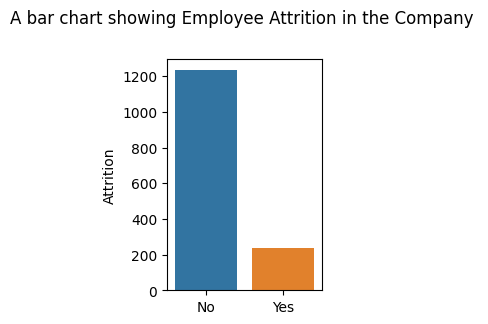

In [ ]:
# Data visualisation for the distribution of the target variable 'Attrition'
x=df['Attrition'].value_counts()
plt.figure(figsize =(2,3))
plt.title('A bar chart showing Employee Attrition in the Company ', y=1.12)
sns.barplot(x= x.index, y=x)
plt.show()

# **Data visualisation using a pie-chart**

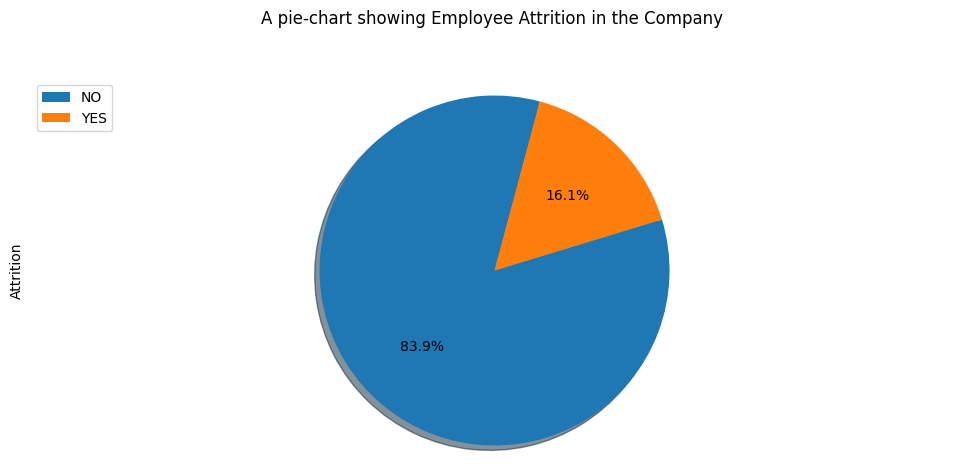

In [33]:
labels = 'NO','YES'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(12, 5),
                            autopct='%1.1f%%',
                            startangle=75,
                            shadow=True,
                            labels=None,
                            )

plt.title('A pie-chart showing Employee Attrition in the Company ', y=1.12)
plt.axis('equal')
plt.legend(labels=labels, loc='upper left')
plt.show()

In [6]:
df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7


<ipython-input-13-d0b373a8e3ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="mako", annot_kws={"size":6})


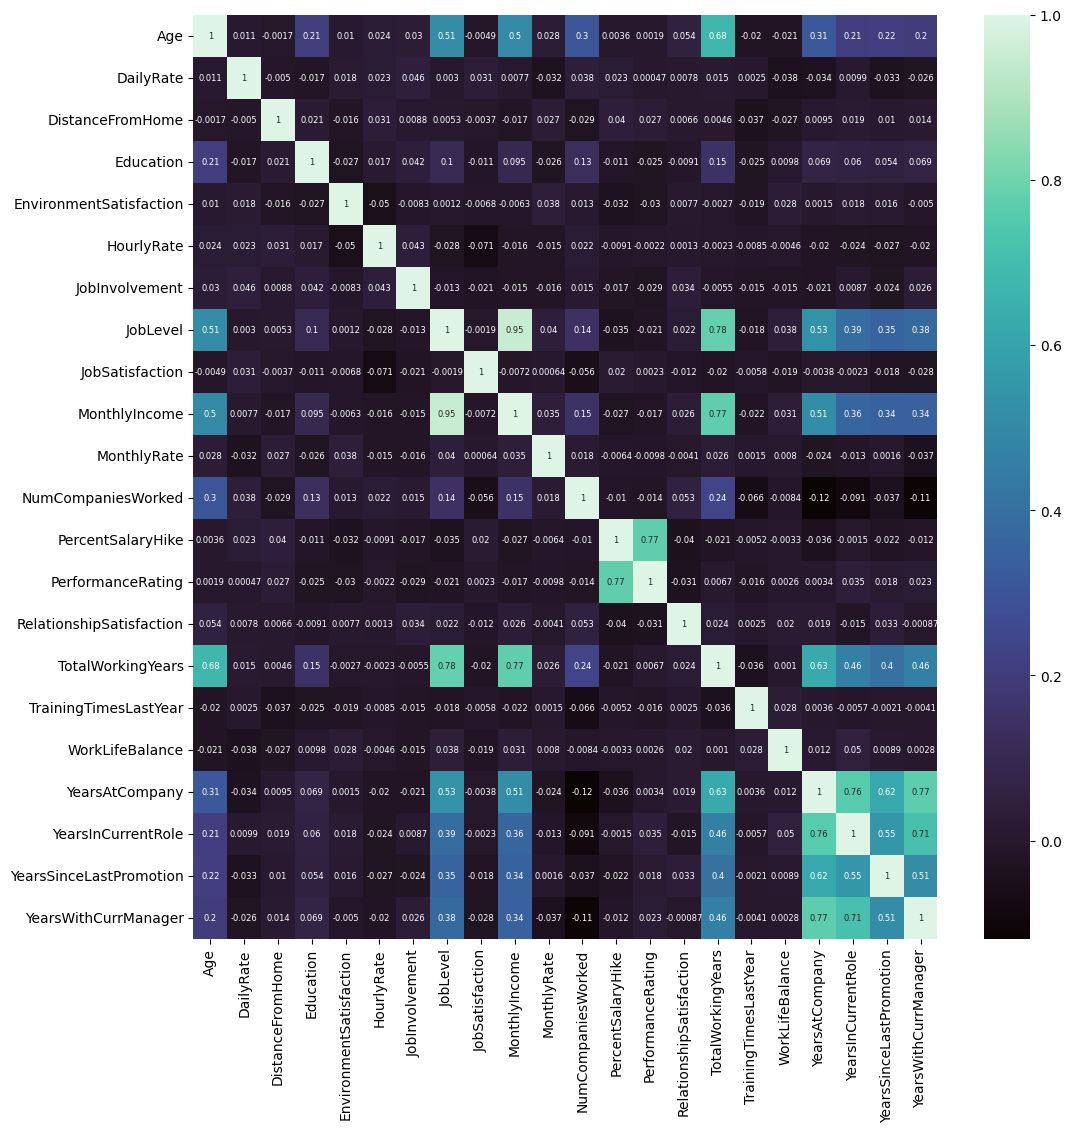

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="mako", annot_kws={"size":6})
plt.show()

In [17]:
obj_ct = df.select_dtypes(include='object').columns
obj_ct

Index([], dtype='object')

# **Encoding categorical variables**

In [19]:
# Importing categorical data enconding libaries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in obj_ct:
    df[column] = le.fit_transform(df[column])

In [23]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [25]:
df['DailyRate'].value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

# **Feature Selection and Importance Analysis**

In [28]:
df.nunique(axis = 0)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int

In [35]:
Ty = df['Attrition']
Tx = df.drop('Attrition',axis = 1)

# **Building the model**

In [36]:
from sklearn.model_selection import train_test_split
Tx_train, Tx_test, Ty_train, Ty_test = train_test_split(Tx, Ty, test_size= 0.20, random_state=0)

# **Scaling the data**

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Tx_train = scaler.fit_transform(Tx_train)
Tx_test = scaler.transform(Tx_test)

In [38]:
Tx_train

array([[0.95238095, 1.        , 0.35913978, ..., 0.        , 0.        ,
        0.        ],
       [0.64285714, 1.        , 0.60645161, ..., 0.22222222, 0.        ,
        0.17647059],
       [0.52380952, 1.        , 0.14050179, ..., 0.38888889, 0.46666667,
        0.29411765],
       ...,
       [0.5952381 , 1.        , 0.77060932, ..., 0.5       , 0.53333333,
        0.47058824],
       [0.47619048, 1.        , 0.11756272, ..., 0.        , 0.        ,
        0.05882353],
       [0.52380952, 1.        , 0.39713262, ..., 0.        , 0.        ,
        0.        ]])

# **#  Model Training, Testing, and Evaluation**

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(Tx_train, Ty_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
Ty_pred = classifier.predict(Tx_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Ty_test, Ty_pred)
print(cm)
accuracy_score(Ty_test, Ty_pred)

[[216  29]
 [ 33  16]]


0.7891156462585034

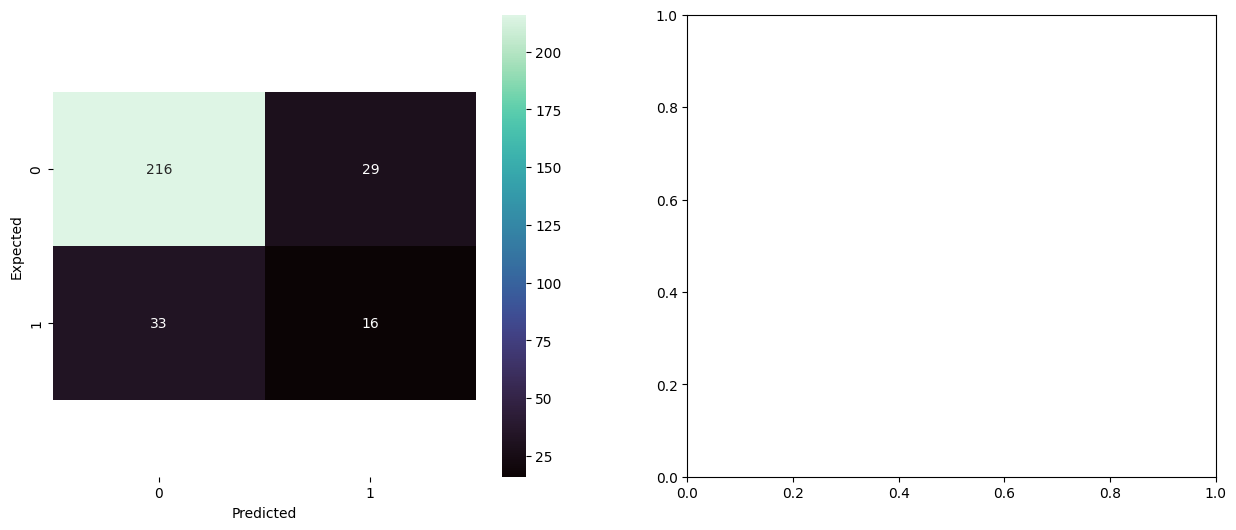

In [44]:
fig = plt.figure(figsize =(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "mako" , fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)